In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import plotly.express as px

In [ ]:
data = {
    "Age": [22, 25, 47, 52, 46, 56, 55, 60, 18, 29, 33, 38],
    "Income": [15000, 18000, 52000, 60000, 48000, 62000, 58000, 70000, 12000, 20000, 35000, 40000]
}

df = pd.DataFrame(data)
df


,Age,Income
0,22,15000
1,25,18000
2,47,52000
3,52,60000
4,46,48000
5,56,62000
6,55,58000
7,60,70000
8,18,12000
9,29,20000


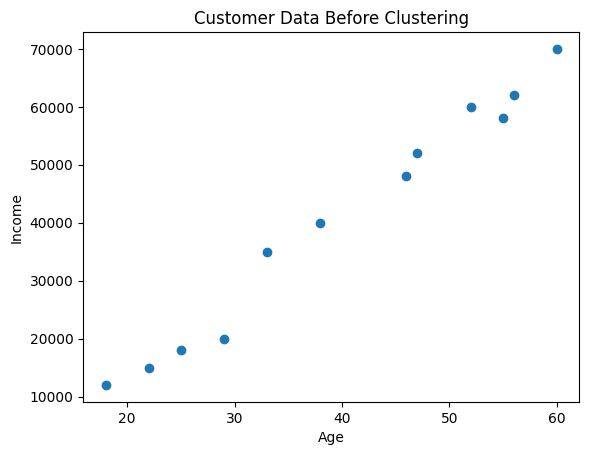

In [ ]:
plt.scatter(df["Age"], df["Income"])
plt.title("Customer Data Before Clustering")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
df["Cluster"] = kmeans.labels_
print(df)

    Age  Income  Cluster
0    22   15000        2
1    25   18000        2
2    47   52000        1
3    52   60000        1
4    46   48000        0
5    56   62000        1
6    55   58000        1
7    60   70000        1
8    18   12000        2
9    29   20000        2
10   33   35000        0
11   38   40000        0


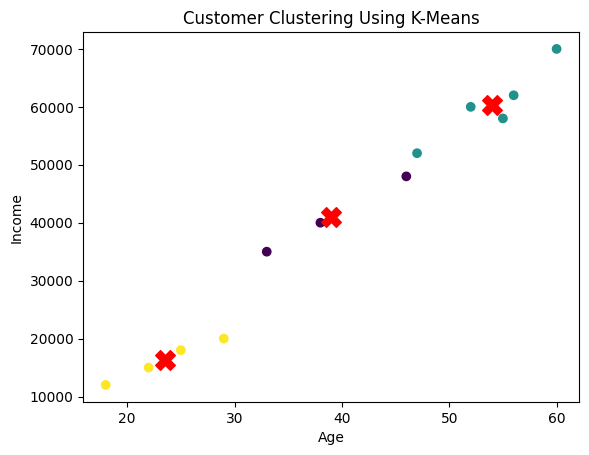

In [ ]:
plt.scatter(df["Age"], df["Income"], c=df["Cluster"])
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="X",
    s=200,
    c="red"
)
plt.title("Customer Clustering Using K-Means")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [ ]:
cluster_profile = df.groupby("Cluster").mean()
# cluster_profile = df.groupby("Cluster").median()
print(cluster_profile)

KeyError: 'Cluster'

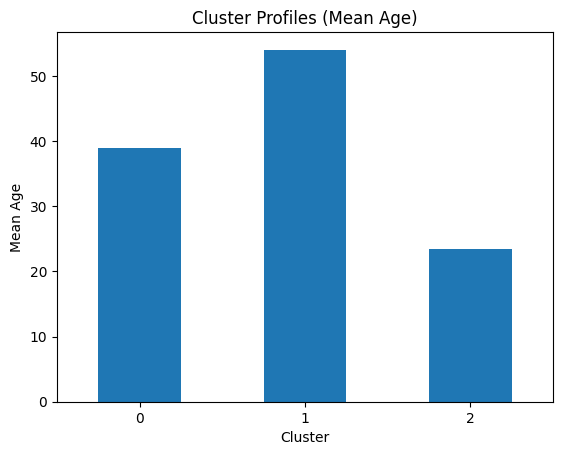

In [ ]:
cluster_profile["Age"].plot(kind="bar")
plt.title("Cluster Profiles (Mean Age)")
plt.ylabel("Mean Age")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.show()


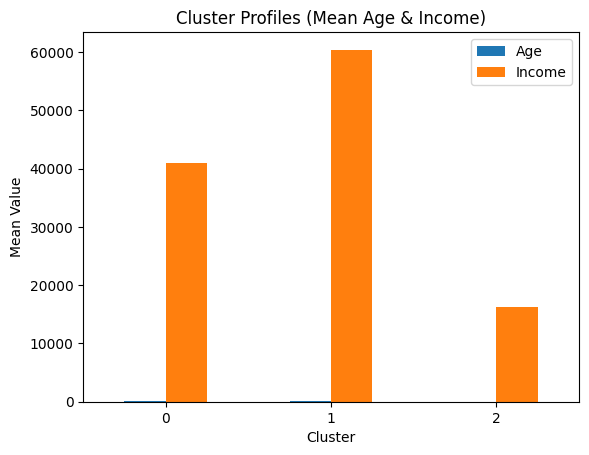

In [ ]:
cluster_profile[["Age", "Income"]].plot(kind="bar")
plt.title("Cluster Profiles (Mean Age & Income)")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.show()

In [ ]:
fig = px.scatter(
    df,
    x="Age",
    y="Income",
    color="Cluster",
    color_continuous_scale=["#a18cd1", "#fbc2eb", "#7bdff6"],   # Aesthetic pastel colors
    size=[10]*len(df),   # equal bubble sizes
    title="K-Means Clustering (Age vs Income)",
    labels={"Age": "Age", "Income": "Annual Income"}
)

# Plot centroids
centroids = kmeans.cluster_centers_
fig.add_scatter(
    x=centroids[:,0],
    y=centroids[:,1],
    mode='markers',
    marker=dict(color="black", size=12, symbol="x"),
    name="Centroids"
)

fig.show()


## **Scatterd plot for the defined dataset from sklearn library directly**

In [ ]:
#loading iris dataset from sklearn library
iris = load_iris()
X = iris.data                # features (4 columns)
feature_names = iris.feature_names

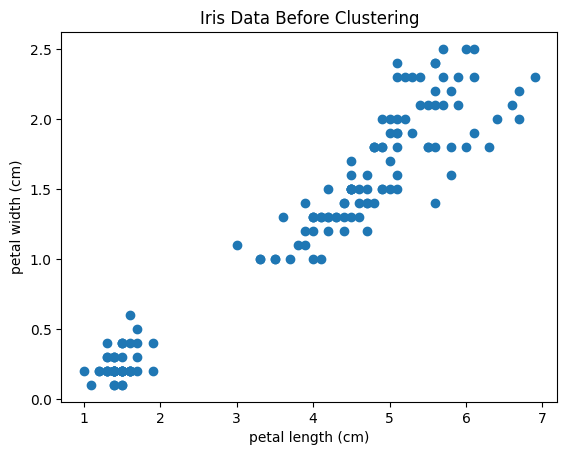

In [ ]:
x_axis = 2   # petal length
y_axis = 3   # petal width

plt.scatter(X[:, x_axis], X[:, y_axis])
plt.title("Iris Data Before Clustering")
plt.xlabel(feature_names[x_axis])
plt.ylabel(feature_names[y_axis])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

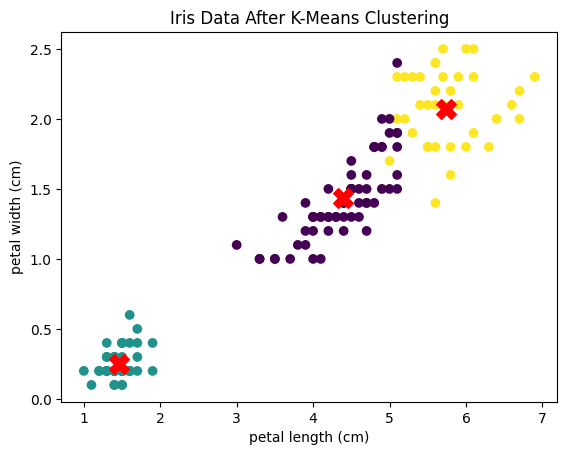

In [ ]:
plt.scatter(X[:, x_axis], X[:, y_axis], c=labels)
plt.scatter(centers[:, x_axis], centers[:, y_axis], marker="X", c="red", s=200)

plt.title("Iris Data After K-Means Clustering")
plt.xlabel(feature_names[x_axis])
plt.ylabel(feature_names[y_axis])
plt.show()

In [ ]:
# Calculate mean feature values for each cluster
cluster_profiles = {}

for i in range(3):
    cluster_profiles[i] = X[labels == i].mean(axis=0)

cluster_profiles


{0: array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]),
 1: array([5.006, 3.428, 1.462, 0.246]),
 2: array([6.85      , 3.07368421, 5.74210526, 2.07105263])}

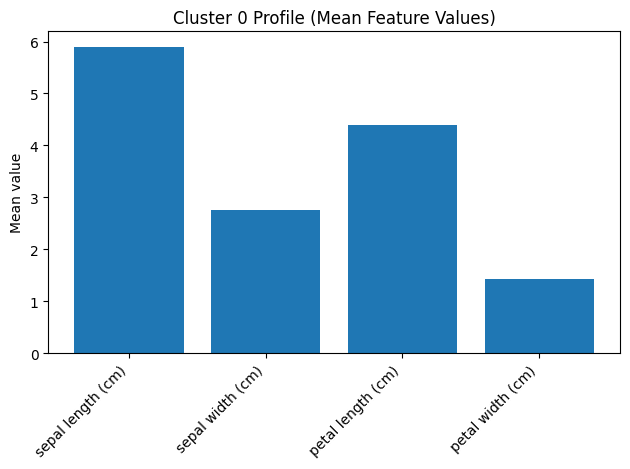

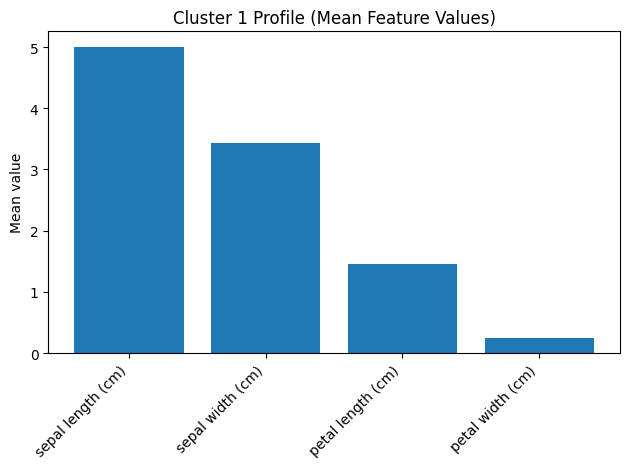

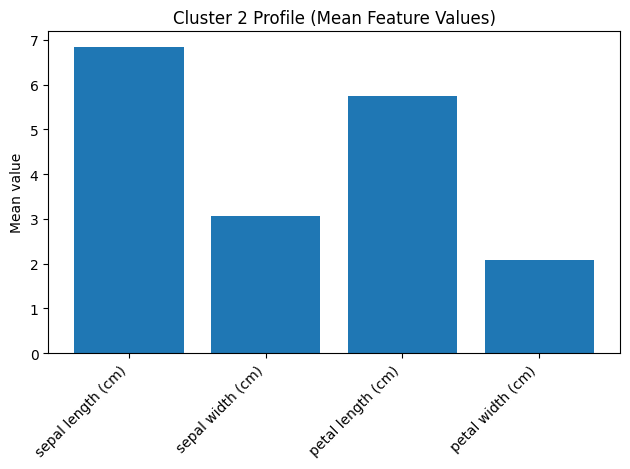

In [ ]:
# Convert profiles into arrays for plotting
cluster_ids = list(cluster_profiles.keys())
means = np.array([cluster_profiles[i] for i in cluster_ids])

# Plot each cluster profile in a separate bar chart
for i in cluster_ids:
    plt.bar(feature_names, cluster_profiles[i])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Cluster {i} Profile (Mean Feature Values)")
    plt.ylabel("Mean value")
    plt.tight_layout()
    plt.show()


# **Scatterd plot for the dataset from csv file**

In [ ]:
df = pd.read_csv("after_titanic.csv")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,55.00,C85,C,Adult
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S,Adult
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S,Adult
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.70,G6,S,Child
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,Adult


In [ ]:
data = df[["Age", "Fare"]]
data.head()

,Age,Fare
0,38,55.00
1,35,53.10
2,54,51.86
3,4,16.70
4,58,26.55


In [ ]:
# data = data.dropna() Not required if you have performed data cleaning before

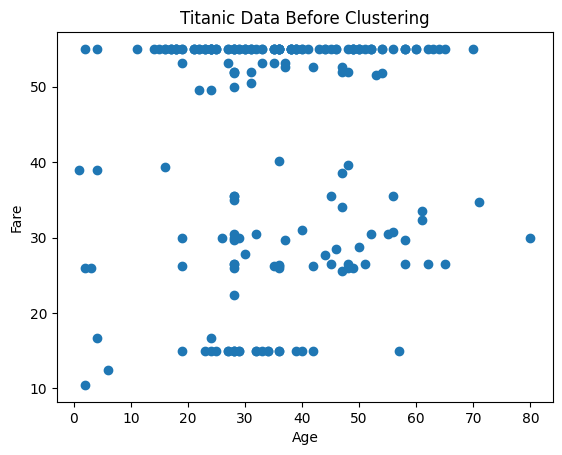

In [ ]:
# Visualize data BEFORE clustering
plt.scatter(data["Age"], data["Fare"])
plt.title("Titanic Data Before Clustering")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
data["Cluster"] = kmeans.labels_
data.head()

,Age,Fare,Cluster
0,38,55.00,1
1,35,53.10,1
2,54,51.86,2
3,4,16.70,0
4,58,26.55,2


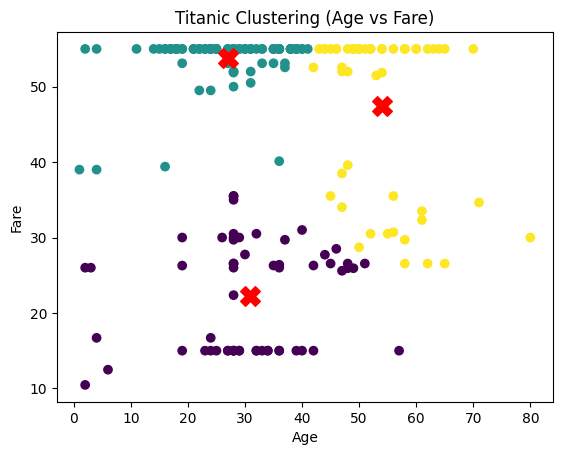

In [ ]:
plt.scatter(data["Age"], data["Fare"], c=data["Cluster"])
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="X",
    c = "Red",
    s=200
)
plt.title("Titanic Clustering (Age vs Fare)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [ ]:
cluster_profile = data.groupby("Cluster").mean()
cluster_profile

,Age,Fare
Cluster,,
0,30.813559,22.301864
1,26.966667,53.810333
2,53.962963,47.422037


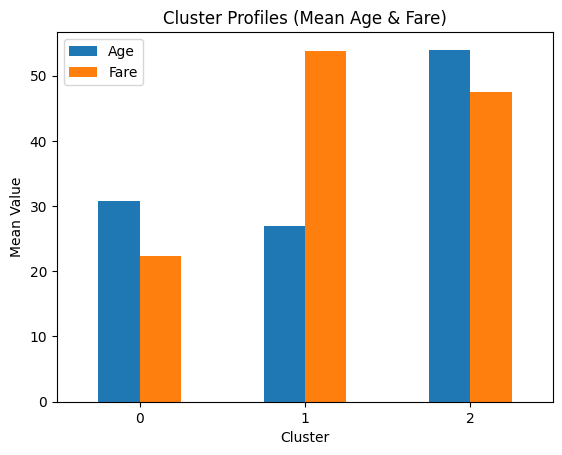

In [ ]:
cluster_profile[["Age", "Fare"]].plot(kind="bar")
plt.title("Cluster Profiles (Mean Age & Fare)")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.show()

#**Conclusion**

Cluster 0 : younger passengers with low fare<br>
Cluster 1 : middle-aged passengers with medium fare<br>
Cluster 2 : older passengers with high fare<br>